# Taxing Exercise: Compute the ACF

In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for H&R Block (ticker symbol HRB) is plotted on the right, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

You will compute the array of autocorrelations for the H&R Block quarterly earnings

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
HRB = pd.read_csv("dataset/HRB.csv")
HRB["Quarter"]=HRB["Quarter"].str.replace("Q", "-Q", regex=True)
HRB["Date"] = pd.PeriodIndex(HRB["Quarter"], freq='Q').to_timestamp()
HRB.drop("Quarter", axis=1, inplace=True)
HRB.set_index("Date",inplace=True)
HRB = HRB.resample('Q').sum()
HRB.head()

,Earnings
Date,
2007-03-31,-0.36
2007-06-30,-0.38
2007-09-30,0.07
2007-12-31,1.85
2008-03-31,-0.34


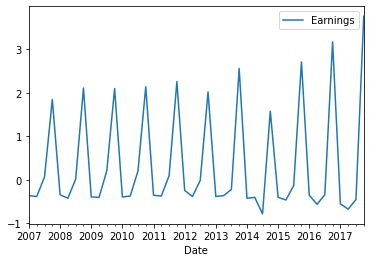

In [7]:
HRB.plot()
plt.show()

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


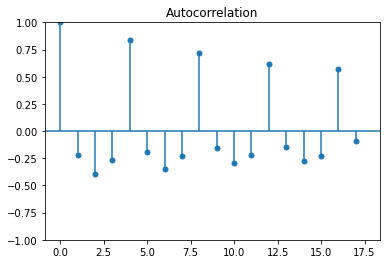

In [6]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB,alpha=1)
plt.show()

# Are We Confident This Stock is Mean Reverting?

you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

In [24]:
MSFT = pd.read_csv("dataset/MSFT.csv", parse_dates=["Date"], index_col=["Date"])
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [25]:
MSFT["returns"] = MSFT.pct_change()
MSFT.head()

,Adj Close,returns
Date,,
2012-08-06,26.107651,NaN
2012-08-07,26.377876,0.010350
2012-08-08,26.438896,0.002313
2012-08-09,26.587088,0.005605
2012-08-10,26.517351,-0.002623


In [26]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = MSFT['returns'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))
MSFT.dropna(inplace=True)


The autocorrelation of weekly MSFT returns is 0.02


In [27]:
# Find the number of observations by taking the length of the returns DataFrame
nobs = len(MSFT['returns'])

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))


The approximate confidence interval is +/- 0.06


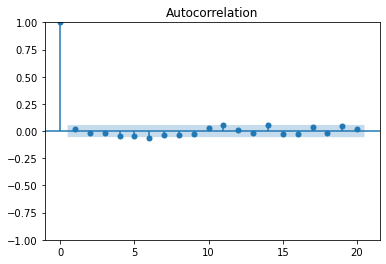

In [28]:

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(MSFT['returns'], alpha=0.05, lags=20)
plt.show()

# Can't Forecast White Noise

A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

You will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. 

In [29]:
import numpy as np
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))


The mean is 0.019 and the standard deviation is 0.049


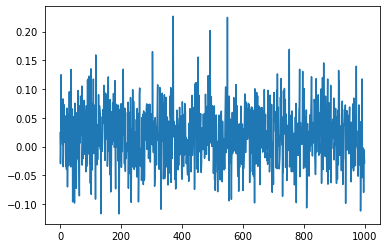

In [30]:

# Plot returns series
plt.plot(returns)
plt.show()


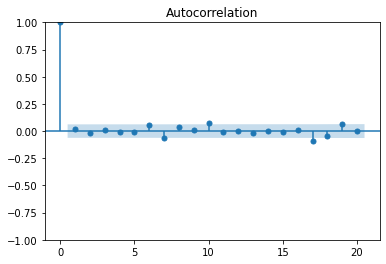

In [31]:

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

# Generate a Random Walk

Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

You will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. If you hit the "Run Code" code button multiple times, you'll see several realizations.

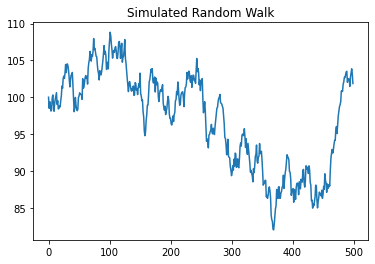

In [32]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

# Get the Drift

In the last exercise, you simulated stock prices that follow a random walk. You will extend this in two ways in this exercise.

- You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
- In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

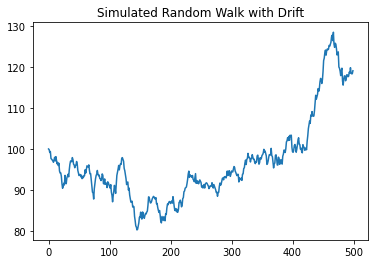

In [33]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

# Are Stock Prices a Random Walk?

Most stock prices follow a random walk (perhaps with a drift). You will look at a time series of Amazon stock prices, pre-loaded in the DataFrame AMZN, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [35]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(MSFT['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(0.19448937450777848, 0.9719508205774475, 0, 1256, {'1%': -3.4355671297788666, '5%': -2.8638438984080117, '10%': -2.5679966213893057}, 2278.307441500807)
The p-value of the test on prices is: 0.9719508205774475


# How About Stock Returns?

In the last exercise, you showed that Microsoft stock prices, contained in the DataFrame `MSFT` follow a random walk. In this exercise. you will do the same thing for returns (percent change in prices) and show that the returns do not follow a random walk.

In [36]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
MSFT_ret = MSFT.pct_change()

# Eliminate the NaN in the first row of returns
MSFT_ret = MSFT_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(MSFT_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 1.7486389814169485e-29


# Is it Stationary?

Here are four time series plots. Which is stationary:

<center><img src="images/02.12.png"  style="width: 400px, height: 300px;"/></center>


- A

# Seasonal Adjustment During Tax Season

Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

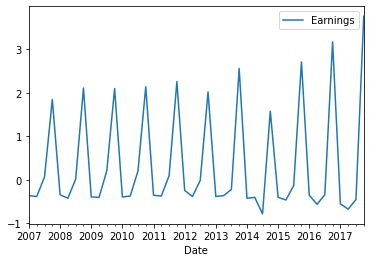

In [38]:
HRB.plot()
plt.show()

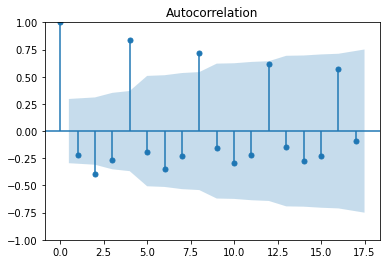

In [37]:
plot_acf(HRB)
plt.show()

In [40]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))



            Earnings
Date                
2007-03-31       NaN
2007-06-30       NaN
2007-09-30       NaN
2007-12-31       NaN
2008-03-31      0.02
2008-06-30     -0.04
2008-09-30     -0.05
2008-12-31      0.26
2009-03-31     -0.05
2009-06-30      0.02


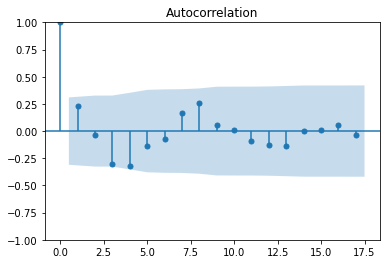

In [41]:
# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()